McDonalds Exploaritory Data Analysis

Business Problem: Customer visits have declined by about 5% over three years. McDonald’s introduced All-Day Breakfast (specifically the McMuffin) to boost traffic. Management wants to know if the program is working or not.

All day breakfast starts October 6 2015

Questions to answer:
- Is All-Day Breakfast increasing sales or customer visits?
- Does its effect differ across regions or restaurant types?
- Are there data quality or consistency issues that might affect our conclusions?

Libraries:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

Datasets:

In [ ]:
sales = pd.read_csv("McD Weekly Sales.csv")
facts = pd.read_csv("McD Restaurant Facts.csv")

Explore/Cleaning

In [10]:
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307125 entries, 0 to 307124
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   REST_KEY    307125 non-null  int64  
 1   ItemN       307125 non-null  int64  
 2   itemdesc    307125 non-null  object 
 3   wk_ending   307125 non-null  object 
 4   urws        302363 non-null  float64
 5   wavg_price  302363 non-null  float64
 6   upt         302363 non-null  float64
 7   agc         302363 non-null  float64
 8   adus        302363 non-null  float64
 9   totunits    302363 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 23.4+ MB


,REST_KEY,ItemN,itemdesc,wk_ending,urws,wavg_price,upt,agc,adus,totunits
0,117,1,Total All Day Breakfast Items,1/10/15,4487.0,1.42,583.8,1098.0,641.0,4487.0
1,248,1,Total All Day Breakfast Items,1/10/15,4328.0,1.51,548.9,1126.4,618.3,4328.0
2,958,1,Total All Day Breakfast Items,1/10/15,4326.0,1.44,654.2,944.7,618.0,4326.0
3,981,1,Total All Day Breakfast Items,1/10/15,2998.0,1.40,517.9,827.0,428.3,2998.0
4,1312,1,Total All Day Breakfast Items,1/10/15,5090.0,1.48,597.1,1217.7,727.1,5090.0


In [11]:
facts.info()
facts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REST_KEY           65 non-null     int64  
 1   rest_label         65 non-null     object 
 2   City               65 non-null     object 
 3   Zip                65 non-null     object 
 4   State              65 non-null     object 
 5   County             65 non-null     object 
 6   latitude           65 non-null     float64
 7   longitude          65 non-null     float64
 8   REST_PLYPL_TYP     60 non-null     object 
 9   REST_DRV_THRU_TYP  65 non-null     object 
 10  REST_TYPE          65 non-null     object 
 11  owner_label        65 non-null     object 
 12  trad_label         65 non-null     object 
 13  subtype_label      65 non-null     object 
 14  incomeq_label      63 non-null     object 
 15  urban_label        63 non-null     object 
 16  social_label       63 non-nu

,REST_KEY,rest_label,City,Zip,State,County,latitude,longitude,REST_PLYPL_TYP,REST_DRV_THRU_TYP,REST_TYPE,owner_label,trad_label,subtype_label,incomeq_label,urban_label,social_label,lstage_label,ppop_09q_label,pgrowthq_label
0,36277,36277-WYOMING - CHICAGO AND GODFREY,WYOMING,49519,MI,KENT MI,42.935777,-85.694556,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,LICENSEE,Y,Traditional,NaN,NaN,NaN,NaN,NaN,NaN
1,36302,36302-GRANDVILLE - RIVERTOWN & IVANREST,GRANDVILLE,49418,MI,KENT MI,42.884165,-85.738159,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,LICENSEE,Y,Traditional,NaN,NaN,NaN,NaN,NaN,NaN
2,26114,26114-OSHTEMO TOWNSHIP,KALAMAZOO,49009,MI,KALAMAZOO MI,42.296384,-85.683582,NaN,2 BOOTH COD,FREESTANDING,LICENSEE,Y,Traditional,1-Highest Income,4-Town and Rural,11 T1- Landed Gentry,01 Y1- Midlif Success,4-2ndLowest PPop_0_9,1-Highest Pgrowth
3,12839,12839-CALEDONIA,CALEDONIA,49316,MI,KENT MI,42.795304,-85.507634,NONE,FACE TO FACE TANDEM,FREESTANDING,LICENSEE,Y,Traditional,2-2ndHighest Income,4-Town and Rural,12 T2- Country Cmfrt,02 Y2- Young Achievrs,1-Highest PPop_0_9,1-Highest Pgrowth
4,33312,33312-WYOMING - BYRON CENTER,WYOMING,49418,MI,KENT MI,42.861650,-85.723800,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,LICENSEE,Y,Traditional,1-Highest Income,2-Suburban,05 S2- Affluentials,01 Y1- Midlif Success,1-Highest PPop_0_9,1-Highest Pgrowth


In [22]:
def normalize_cols(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(r"[^0-9a-zA-Z]+", "_", regex=True)
        .str.strip("_")
    )
    return df

sales = normalize_cols(sales)
sales = sales.rename(columns={'itemn':'item'})

facts = normalize_cols(facts)

In [23]:
sales.head()

,rest_key,item,itemdesc,wk_ending,urws,wavg_price,upt,agc,adus,totunits
0,117,1,Total All Day Breakfast Items,1/10/15,4487.0,1.42,583.8,1098.0,641.0,4487.0
1,248,1,Total All Day Breakfast Items,1/10/15,4328.0,1.51,548.9,1126.4,618.3,4328.0
2,958,1,Total All Day Breakfast Items,1/10/15,4326.0,1.44,654.2,944.7,618.0,4326.0
3,981,1,Total All Day Breakfast Items,1/10/15,2998.0,1.40,517.9,827.0,428.3,2998.0
4,1312,1,Total All Day Breakfast Items,1/10/15,5090.0,1.48,597.1,1217.7,727.1,5090.0


In [17]:
facts.head()

,rest_key,rest_label,city,zip,state,county,latitude,longitude,rest_plypl_typ,rest_drv_thru_typ,rest_type,owner_label,trad_label,subtype_label,incomeq_label,urban_label,social_label,lstage_label,ppop_09q_label,pgrowthq_label
0,36277,36277-WYOMING - CHICAGO AND GODFREY,WYOMING,49519,MI,KENT MI,42.935777,-85.694556,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,LICENSEE,Y,Traditional,NaN,NaN,NaN,NaN,NaN,NaN
1,36302,36302-GRANDVILLE - RIVERTOWN & IVANREST,GRANDVILLE,49418,MI,KENT MI,42.884165,-85.738159,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,LICENSEE,Y,Traditional,NaN,NaN,NaN,NaN,NaN,NaN
2,26114,26114-OSHTEMO TOWNSHIP,KALAMAZOO,49009,MI,KALAMAZOO MI,42.296384,-85.683582,NaN,2 BOOTH COD,FREESTANDING,LICENSEE,Y,Traditional,1-Highest Income,4-Town and Rural,11 T1- Landed Gentry,01 Y1- Midlif Success,4-2ndLowest PPop_0_9,1-Highest Pgrowth
3,12839,12839-CALEDONIA,CALEDONIA,49316,MI,KENT MI,42.795304,-85.507634,NONE,FACE TO FACE TANDEM,FREESTANDING,LICENSEE,Y,Traditional,2-2ndHighest Income,4-Town and Rural,12 T2- Country Cmfrt,02 Y2- Young Achievrs,1-Highest PPop_0_9,1-Highest Pgrowth
4,33312,33312-WYOMING - BYRON CENTER,WYOMING,49418,MI,KENT MI,42.861650,-85.723800,NONE,SIDE BY SIDE 2 BOOTH,FREESTANDING,LICENSEE,Y,Traditional,1-Highest Income,2-Suburban,05 S2- Affluentials,01 Y1- Midlif Success,1-Highest PPop_0_9,1-Highest Pgrowth


In [24]:
sales["wk_ending"] = pd.to_datetime(sales["wk_ending"], errors="coerce")
merged = pd.merge(sales, facts, on="rest_key", how="left")

C:\Users\emmal\AppData\Local\Temp\ipykernel_29152\102504795.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales["wk_ending"] = pd.to_datetime(sales["wk_ending"], errors="coerce")


In [26]:
merged = merged.rename(columns={
    "urws": "URWS",
    "adus": "ADUS",
    "upt": "UPT",
    "wavg_price": "WAVG_PRICE",
    "agc": "AGC",
    "itemdesc": "CATEGORY",
    "wk_ending": "WK_ENDING",
})

In [28]:
merged.head()

,rest_key,item,CATEGORY,WK_ENDING,URWS,WAVG_PRICE,UPT,AGC,ADUS,totunits,...,rest_type,owner_label,trad_label,subtype_label,incomeq_label,urban_label,social_label,lstage_label,ppop_09q_label,pgrowthq_label
0,117,1,Total All Day Breakfast Items,2015-01-10,4487.0,1.42,583.8,1098.0,641.0,4487.0,...,FREESTANDING,MCOPCO,Y,Traditional,4-2ndLowest Income,1-Urban,02 U2- Midtown Mix,06 F3- Mainstrm Families,1-Highest PPop_0_9,5-Lowest Pgrowth
1,248,1,Total All Day Breakfast Items,2015-01-10,4328.0,1.51,548.9,1126.4,618.3,4328.0,...,FREESTANDING,MCOPCO,Y,Traditional,3-Mid Income,2-Suburban,07 S4- Inner Subs,10 M3- Cautious Couples,3-Mid PPop_0_9,5-Lowest Pgrowth
2,958,1,Total All Day Breakfast Items,2015-01-10,4326.0,1.44,654.2,944.7,618.0,4326.0,...,FREESTANDING,MCOPCO,Y,Traditional,4-2ndLowest Income,2-Suburban,06 S3- Middleburbs,06 F3- Mainstrm Families,2-2ndHighest PPop_0_9,5-Lowest Pgrowth
3,981,1,Total All Day Breakfast Items,2015-01-10,2998.0,1.40,517.9,827.0,428.3,2998.0,...,FREESTANDING,LICENSEE,Y,Traditional,5-Lowest Income,2-Suburban,07 S4- Inner Subs,03 Y3- Strivng Singles,1-Highest PPop_0_9,5-Lowest Pgrowth
4,1312,1,Total All Day Breakfast Items,2015-01-10,5090.0,1.48,597.1,1217.7,727.1,5090.0,...,FREESTANDING,LICENSEE,Y,Traditional,4-2ndLowest Income,2-Suburban,07 S4- Inner Subs,10 M3- Cautious Couples,3-Mid PPop_0_9,4-2ndLowest Pgrowth


In [33]:
merged['CATEGORY'].unique()

array(['Total All Day Breakfast Items', 'Total Breakfast Sandwich',
       'Total McMuffins', 'Egg McMuffin', 'Sausage McMuffin',
       'Sausage Egg McMuffin', 'Total Biscuits', 'Bac Egg Ch Biscuit',
       'Sausage Biscuit', 'Sausage Egg Biscuit', 'Hashbrown',
       'Total McGriddles', 'Bac Egg Ch McGriddle', 'Sau Egg Ch McGriddle',
       'Total Bagels', 'Beef Category', 'Large Burgers', 'Big Mac',
       'Core QP and QPC', 'Hamburger', 'Cheeseburger', 'Chicken Category',
       'Total Fries', 'McChicken', 'McDouble'], dtype=object)

In [34]:
launch_date = pd.Timestamp("2015-10-06")  # official nationwide launch

In [36]:
sales['wk_ending'].sort_values().tail(10)

270834   2016-08-20
270835   2016-08-20
270836   2016-08-20
270837   2016-08-20
270838   2016-08-20
270839   2016-08-20
270840   2016-08-20
270841   2016-08-20
270831   2016-08-20
270562   2016-08-20
Name: wk_ending, dtype: datetime64[ns]

In [ ]:
sales['wk_ending'].sort_values().head(10) #from 2013/1/12 to 2016/8/20 (year/month/day)

4871   2013-01-12
4334   2013-01-12
4333   2013-01-12
4332   2013-01-12
4331   2013-01-12
4330   2013-01-12
4329   2013-01-12
4328   2013-01-12
4327   2013-01-12
4326   2013-01-12
Name: wk_ending, dtype: datetime64[ns]

In [41]:
merged["ADB_ACTIVE"] = (merged["WK_ENDING"] >= launch_date).astype(int)
merged["ADB_ACTIVE"].value_counts()

ADB_ACTIVE
0    232375
1     74750
Name: count, dtype: int64

In [43]:
merged.isna().sum().sort_values(ascending=False).head(10)

rest_plypl_typ    23625
pgrowthq_label     9450
ppop_09q_label     9450
incomeq_label      9450
urban_label        9450
social_label       9450
lstage_label       9450
ADUS               4762
totunits           4762
AGC                4762
dtype: int64

In [44]:
merged.duplicated().sum()

0

In [54]:
cols_to_check = ["URWS", "ADUS", "UPT", "AGC", "WAVG_PRICE"]

for col in cols_to_check:
    count_bad = (merged[col] <= 0).sum()
    print(f"There are {count_bad} rows where {col} ≤ 0")

There are 0 rows where URWS ≤ 0
There are 0 rows where ADUS ≤ 0
There are 0 rows where UPT ≤ 0
There are 0 rows where AGC ≤ 0
There are 0 rows where WAVG_PRICE ≤ 0


In [46]:
merged[["URWS","ADUS","UPT","AGC","WAVG_PRICE"]].describe().T

,count,mean,std,min,25%,50%,75%,max
URWS,302363.0,1385.288071,1686.109154,3.00,265.00,645.00,1790.00,13217.00
ADUS,302363.0,198.710101,241.536347,1.00,38.10,92.70,257.10,1888.10
UPT,302363.0,150.584539,173.964196,1.30,29.60,70.30,194.40,1268.00
AGC,302363.0,1327.253945,332.851216,293.70,1085.30,1316.10,1556.90,2670.00
WAVG_PRICE,302363.0,2.253482,0.989277,0.51,1.25,2.23,2.99,5.53


| Column | Full Meaning | Description | Why It Matters |
|:--------|:--------------|:-------------|:----------------|
| **URWS** | *Unit Restaurant Weekly Sales* | Total weekly sales (in dollars) for each restaurant. | Main performance metric — used to measure revenue impact of All-Day Breakfast. |
| **ADUS** | *Average Daily Unit Sales* | Average number of menu items sold per day during the week. | Shows changes in **sales volume** independent of total revenue. |
| **UPT** | *Units Per Transaction* | Average number of items sold per customer transaction. | Indicates **customer behavior** — are people buying more items per visit? |
| **AGC** | *Average Guest Check* | Average amount spent per customer (total sales ÷ transactions). | Helps determine whether growth is due to **higher spending per visit**. |
| **WAVG_PRICE** | *Weighted Average Price* | Weighted average menu price of all items sold that week. | Controls for **price effects** (inflation, promotions, or price changes). |

In [47]:
merged.groupby("ADB_ACTIVE")[["URWS","ADUS","UPT","AGC","WAVG_PRICE"]].mean()


,URWS,ADUS,UPT,AGC,WAVG_PRICE
ADB_ACTIVE,,,,,
0,1376.247731,197.364510,146.408440,1354.230752,2.217952
1,1412.996733,202.834342,163.384293,1244.569973,2.362381


Visuals

Text(0.5, 1.0, 'Distribution of Weekly Sales (URWS)')

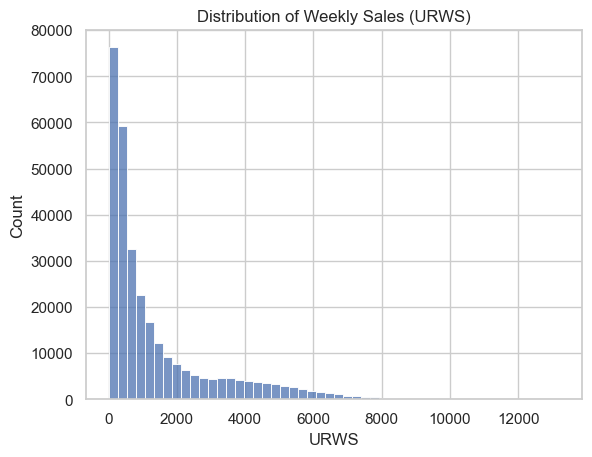

In [49]:
sns.set(style="whitegrid")

# Sales distribution
sns.histplot(merged["URWS"], bins=50)
plt.title("Distribution of Weekly Sales (URWS)")

Text(0.5, 1.0, 'URWS Before vs After All-Day Breakfast')

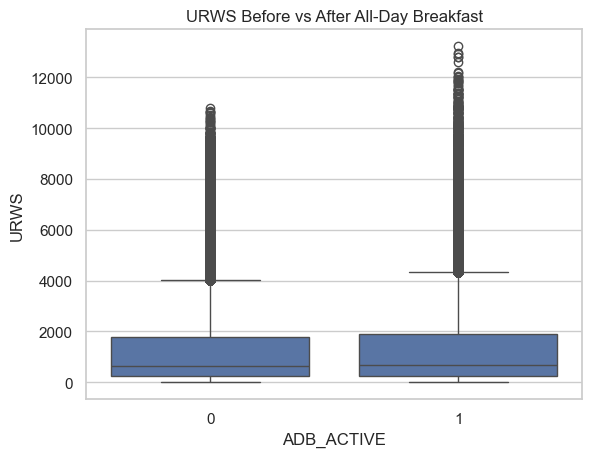

In [50]:
# Pre vs Post boxplot
sns.boxplot(x="ADB_ACTIVE", y="URWS", data=merged)
plt.title("URWS Before vs After All-Day Breakfast")

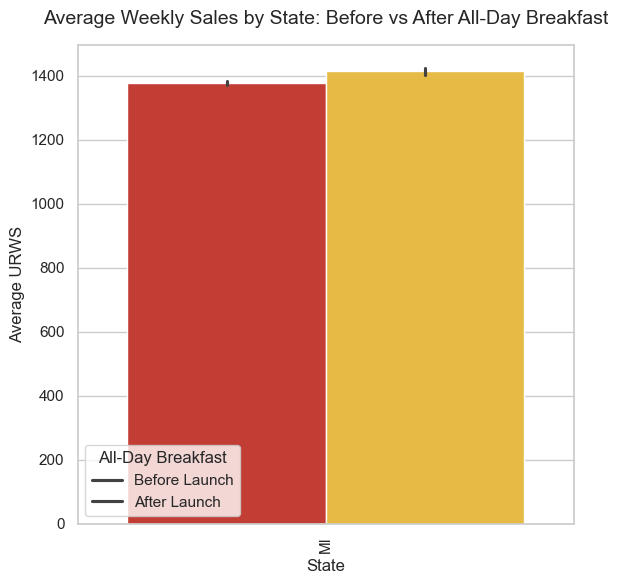

In [62]:
plt.figure(figsize=(6, 6))
sns.barplot(
    x="state", y="URWS", hue="ADB_ACTIVE", data=merged,
    palette={0: "#DA291C", 1: "#FFC72C"}  # red for before, yellow for after
)

plt.xticks(rotation=90)
plt.title("Average Weekly Sales by State: Before vs After All-Day Breakfast", fontsize=14, pad=15)
plt.xlabel("State", fontsize=12)
plt.ylabel("Average URWS", fontsize=12)
plt.legend(title="All-Day Breakfast", labels=["Before Launch", "After Launch"])
plt.tight_layout()
plt.show()

In [52]:
from scipy.stats import ttest_ind

pre = merged.loc[merged["ADB_ACTIVE"]==0, "URWS"].dropna()
post = merged.loc[merged["ADB_ACTIVE"]==1, "URWS"].dropna()

t_stat, p_val = ttest_ind(pre, post, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

T-statistic: -5.11, p-value: 0.0000


In [55]:
merged["EST_TRANSACTIONS"] = merged["ADUS"] / merged["UPT"]
merged["EST_TRANSACTIONS"].describe()

count    302363.000000
mean          1.327253
std           0.332864
min           0.292531
25%           1.085325
50%           1.316181
75%           1.557006
max           2.678571
Name: EST_TRANSACTIONS, dtype: float64

In [56]:
merged.groupby("ADB_ACTIVE")[["URWS","ADUS","UPT","AGC","WAVG_PRICE","EST_TRANSACTIONS"]].mean()

,URWS,ADUS,UPT,AGC,WAVG_PRICE,EST_TRANSACTIONS
ADB_ACTIVE,,,,,,
0,1376.247731,197.364510,146.408440,1354.230752,2.217952,1.354234
1,1412.996733,202.834342,163.384293,1244.569973,2.362381,1.244555


In [58]:
# Compute average weekly sales
weekly_sales = merged.groupby("WK_ENDING")["URWS"].mean().reset_index()

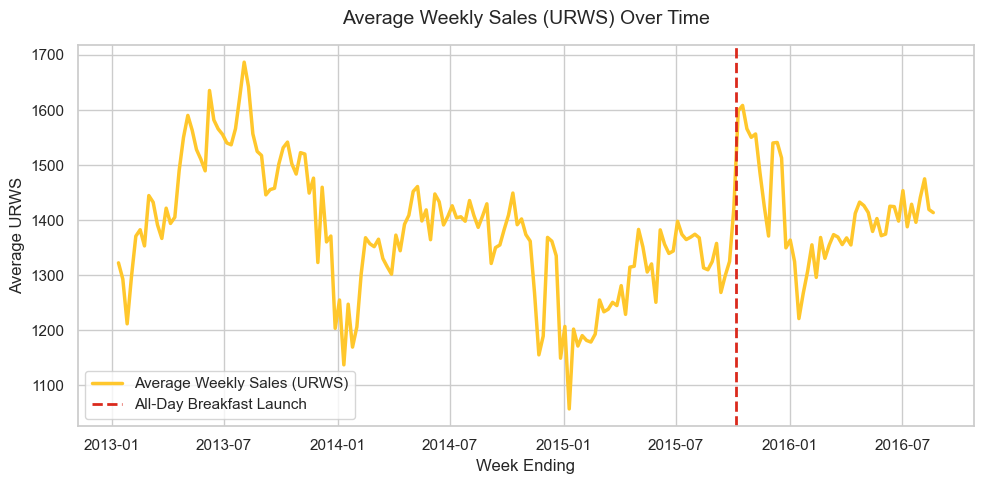

In [60]:
# Plot with McDonald's colors
plt.figure(figsize=(10, 5))
plt.plot(weekly_sales["WK_ENDING"], weekly_sales["URWS"],
         color="#FFC72C", linewidth=2.5, label="Average Weekly Sales (URWS)")  # McDonald's yellow

# Add All-Day Breakfast launch marker (Oct 6, 2015)
launch_date = pd.Timestamp("2015-10-06")
plt.axvline(launch_date, color="#DA291C", linestyle="--", linewidth=2,
            label="All-Day Breakfast Launch")  # McDonald's red

# Titles and labels
plt.title("Average Weekly Sales (URWS) Over Time", fontsize=14, pad=15)
plt.xlabel("Week Ending", fontsize=12)
plt.ylabel("Average URWS", fontsize=12)
plt.legend()
plt.tight_layout()

plt.show()

In [63]:
merged.tail()

,rest_key,item,CATEGORY,WK_ENDING,URWS,WAVG_PRICE,UPT,AGC,ADUS,totunits,...,trad_label,subtype_label,incomeq_label,urban_label,social_label,lstage_label,ppop_09q_label,pgrowthq_label,ADB_ACTIVE,EST_TRANSACTIONS
307120,26174,25,McDouble,2013-09-07,1926.0,1.00,264.1,1041.9,275.1,1926.0,...,Y,Traditional,3-Mid Income,4-Town and Rural,14 T4- Rustic Living,03 Y3- Strivng Singles,3-Mid PPop_0_9,2-2ndHighest Pgrowth,0,1.041651
307121,33312,25,McDouble,2013-09-07,1608.0,1.00,160.7,1429.3,229.7,1608.0,...,Y,Traditional,1-Highest Income,2-Suburban,05 S2- Affluentials,01 Y1- Midlif Success,1-Highest PPop_0_9,1-Highest Pgrowth,0,1.429371
307122,36277,25,McDouble,2013-09-07,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Traditional,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
307123,36302,25,McDouble,2013-09-07,1530.0,1.00,222.3,983.1,218.6,1530.0,...,Y,Traditional,NaN,NaN,NaN,NaN,NaN,NaN,0,0.983356
307124,36303,25,McDouble,2013-09-07,1926.0,1.02,191.1,1425.0,272.0,1906.0,...,Y,Traditional,3-Mid Income,2-Suburban,06 S3- Middleburbs,10 M3- Cautious Couples,3-Mid PPop_0_9,5-Lowest Pgrowth,0,1.423339
